# Root-CyNAPS reference simulation

Current file is a notebook presenting the procedure to run a reference simulations of the Root-CyNAPS model used for the following publication: 

    Tristan Gérault, Christophe Pradal, Romain Barillot, Céline Richard-Molard, Marion Gauthier, Alexandra Jullien, Frédéric Rees, 
    "Do specific root zones shape plant net N uptake? Modeling insights from Root-CyNAPS", submitted

# Importing packages

In [1]:
# Model packages
import openalea.rootcynaps
from openalea.rootcynaps.soon_public_packages.static_soil_assembly import StaticSoilAssembly
from openalea.rootcynaps import RootCyNAPS

# Utility packages
from openalea.fspm.utility.scenario import MakeScenarios as ms
from openalea.fspm.utility.writer import Logger
from openalea.fspm.utility.plot import analyze_data
from openalea.metafspm.scene_wrapper import play_Orchestra

# Importing a set of parameter to build a scenario

Bellow is the example of a 10 day-old spring wheat, a small root system for quick testing of the model. You can also use scenario "RC_ref_50" for simulations on a 50 day-old spring wheat, more representative of results presented in the article.

In [2]:

scenarios = ms.from_table(file_path="inputs/Scenarios_25_07_02.xlsx", which=["RC_ref_10"])

# Define custom scene parameters to place the root systems in the scene, and the nutrient solution concentration

Here we only introduce one plant

In [3]:
scene_xrange = 0.15
scene_yrange = 0.15
sowing_density = 1
target_nitrate_concentrations = [5e-1]    

# Running simulation (about 30 seconds at 10 days)

In [6]:
%%capture

# Wrapp to avoid multiprocessing pending (Specific to Jupyter notebook)
if __name__ == "__main__":

    for scenario_name, scenario in scenarios.items():
        
        for concentration in target_nitrate_concentrations:
            scenario["parameters"]["root_cynaps"]["roots"]["dissolved_mineral_N"] = 5e-7 * concentration / 1e-1
            
            current_scenario_name = f"{str(scenario_name)}_{concentration:.2e}"
            play_Orchestra(scene_name=current_scenario_name, output_folder="outputs", plant_models=[RootCyNAPS], plant_scenarios=[scenario], 
                                soil_model=StaticSoilAssembly, soil_scenario=scenario,
                                translator_path=openalea.rootcynaps.__path__[0],
                                logger_class=Logger, log_settings=Logger.light_log,
                                scene_xrange=scene_xrange, scene_yrange=scene_yrange, sowing_density=sowing_density,
                                time_step=3600, n_iterations=24)

# Analyzing model outputs

Bellow is the example of nitrogen input, output and transformation flows in the root segment symplasm over the simulation time for the last simulation that you run

[INFO] Starting data analysis
     [INFO] Producing 2D plots from summed and averaged properties
     [INFO] Finished 2d plots


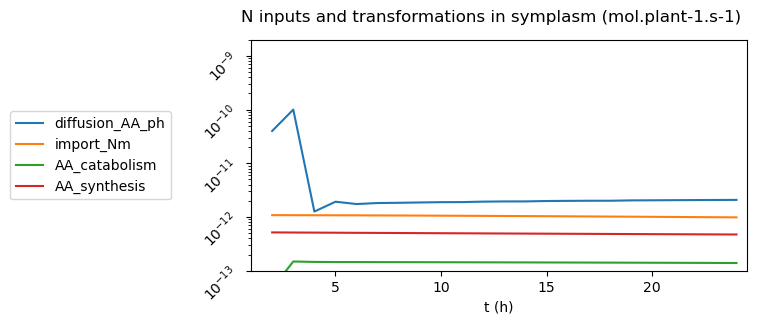

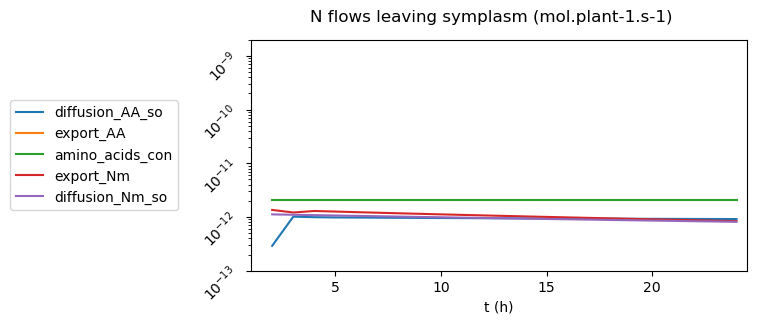

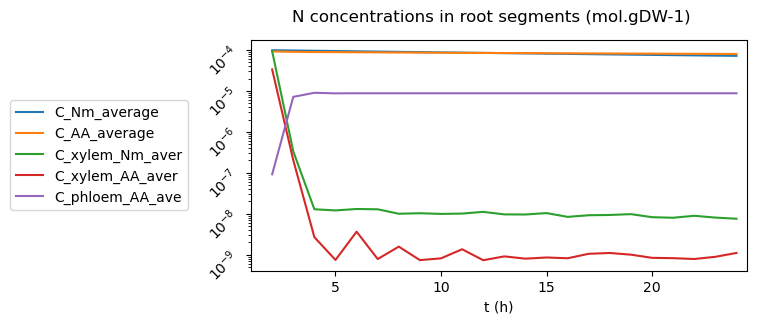

In [7]:
analyze_data(scenarios=[current_scenario_name], outputs_dirpath="outputs", target_folder_key="RootCyNAPS_0",
                        inputs_dirpath="inputs",
                        on_sums=True,
                        on_performance=False,
                        animate_raw_logs=False,
                        target_properties=None # All properties are analyzed
                        )

For 3D output visualization available at "outputs/{scenario_name}/RootCyNAPS_0/*.gltf", you can open them by drag and drop in <https://gltf-viewer.donmccurdy.com/>